In [1]:
! pip install ucimlrepo
! pip install pandas
! pip install --force-reinstall numpy==1.18.5
! pip install scipy
! pip install seaborn
! pip install statsmodels
! pip install scikit-learn

  Using cached numpy-1.18.5.zip (5.4 MB)
  Installing build dependencies ... one
  Getting requirements to build wheel ... one
  Preparing metadata (pyproject.toml) ... rror
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [24 lines of output]
      Running from numpy source directory.
      <string>:461: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
      Traceback (most recent call last):
        File "/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction to Machine Learning Supervised Learning /week 8/lib/python3.10/site-packages/pip/_vendor/pep517/in_process/_in_process.py", line 363, in <module>
          main()
        File "/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction to Machine Learning Supervised Learning /week 8/lib/python3.10/site-packages/pip/_vendor/pep517/in_process/_in_proce

/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction to Machine Learning Supervised Learning /week 8/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction to Machine Learning Supervised Learning /week 8/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


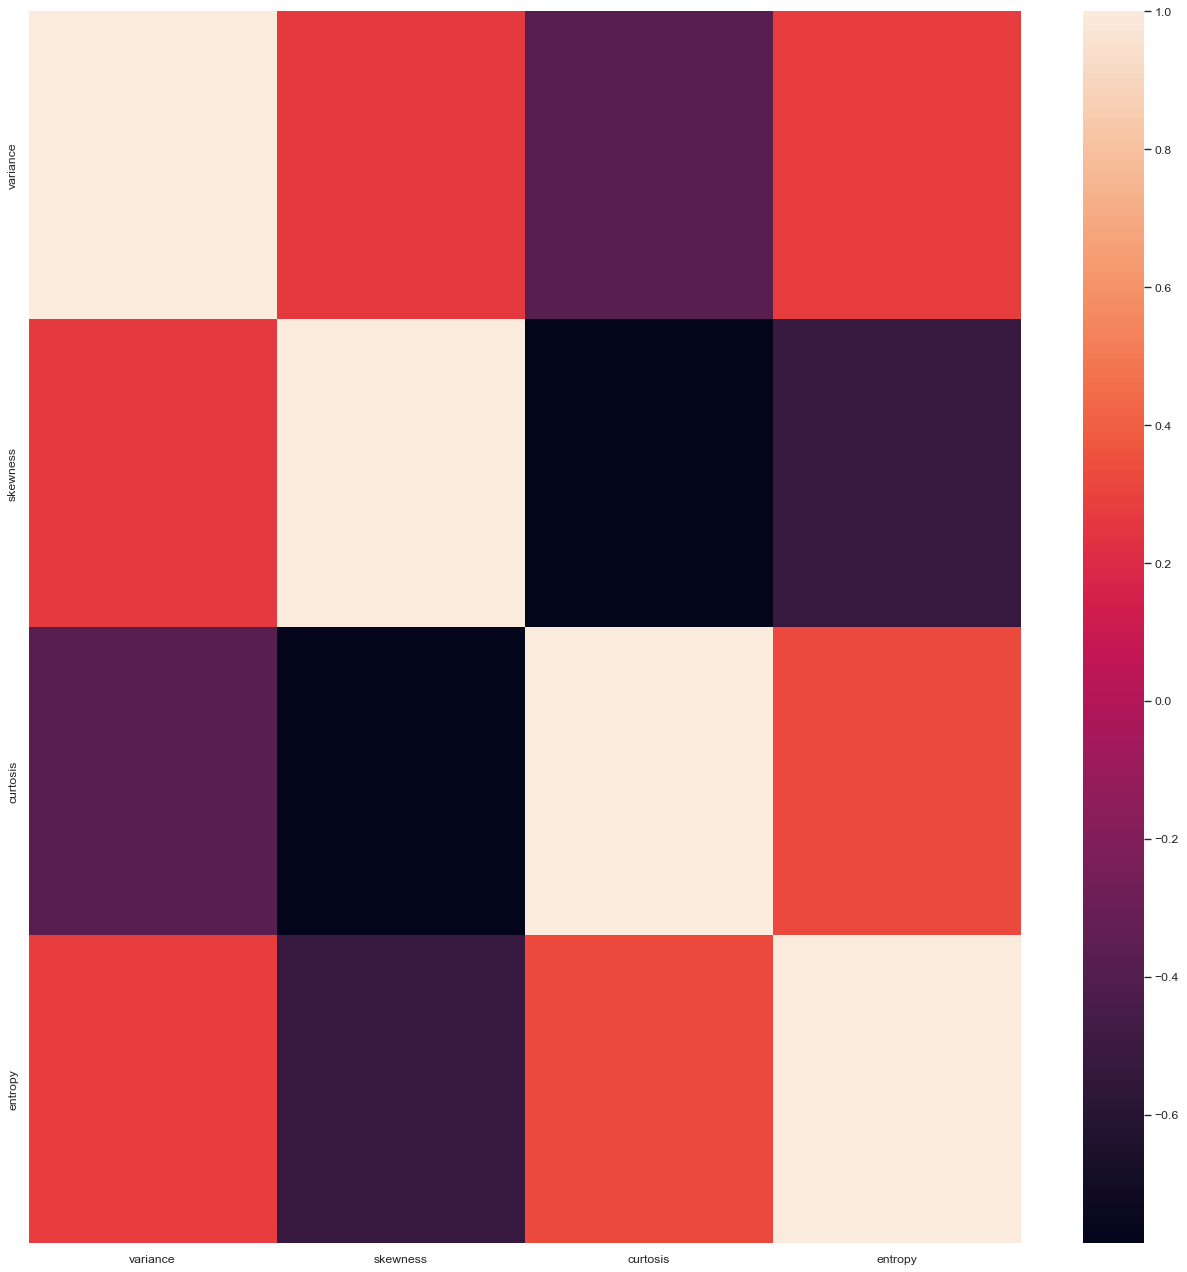

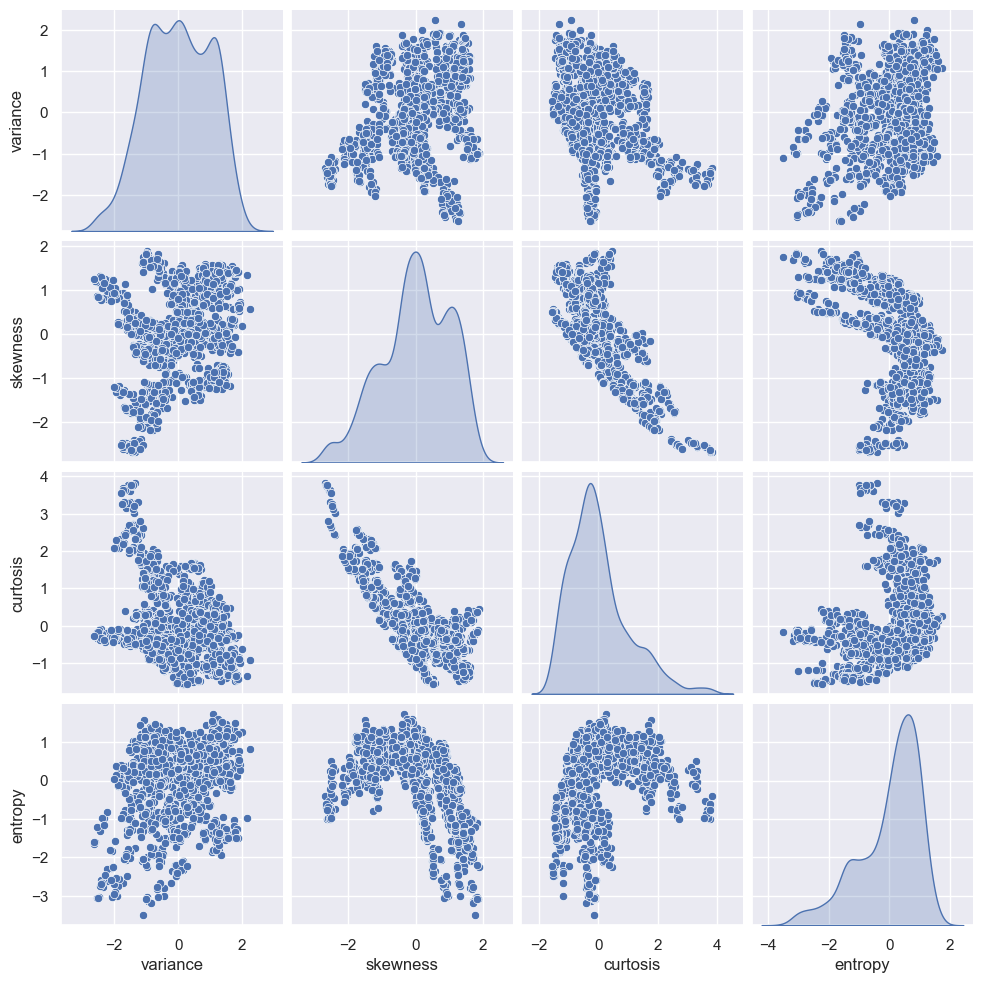

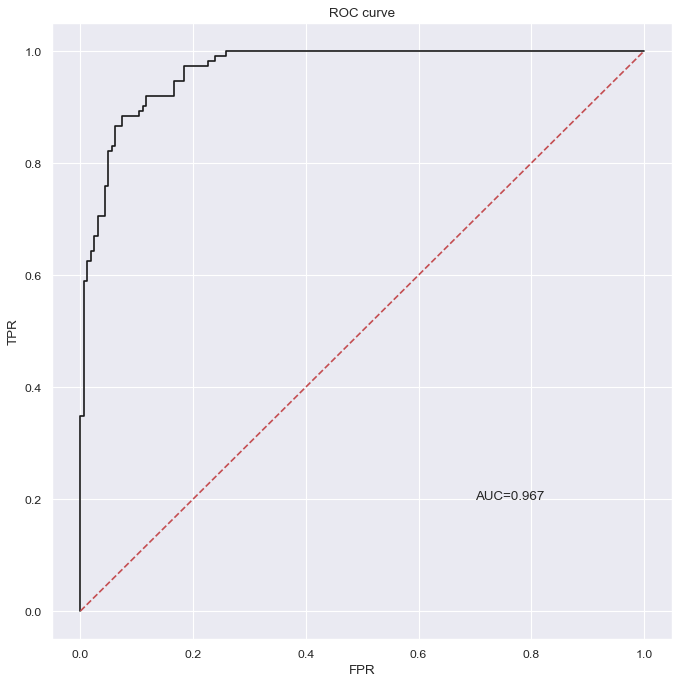

Logistic Regression (without skewness) Score: 0.8909090909090909


/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction to Machine Learning Supervised Learning /week 8/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction to Machine Learning Supervised Learning /week 8/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


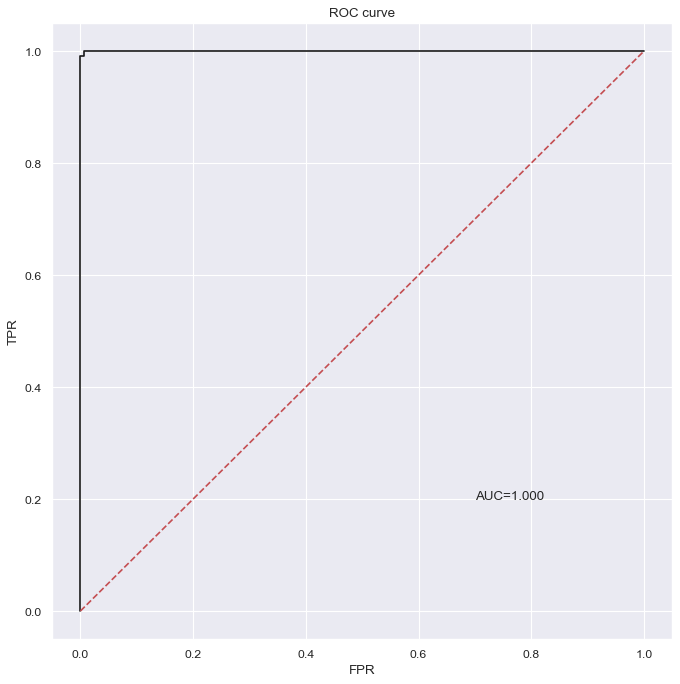

Logistic Regression (with skewness) Score: 0.9854545454545455


In [11]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from pprint import pformat
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from matplotlib.colors import Normalize

# ________  ________  ________  ________          ________  ________   _______   _______                                                                                            
#|\   ____\|\   ____\|\   ____\|\   __  \        |\   ____\|\   ____\ /  ___  \ /  ___  \                                                                                           
#\ \  \___|\ \  \___|\ \  \___|\ \  \|\  \       \ \  \___|\ \  \___|/__/|_/  //__/|_/  /|                                                                                          
# \ \  \    \ \_____  \ \  \    \ \   __  \       \ \_____  \ \  \___|__|//  / /__|//  / /                                                                                          
#  \ \  \____\|____|\  \ \  \____\ \  \ \  \       \|____|\  \ \  ___  \ /  /_/__  /  /_/__                                                                                         
#   \ \_______\____\_\  \ \_______\ \__\ \__\        ____\_\  \ \_______\\________\\________\                                                                                       
#    \|_______|\_________\|_______|\|__|\|__|       |\_________\|_______|\|_______|\|_______|                                                                                       
#             \|_________|                          \|_________|                                                                                                                    
#                                                                                                                                                                                                                                                                                                                                                                   
# ________  ___  ___  ________  _______   ________  ___      ___ ___  ________  _______   ________  ___       _______   ________  ________  ________   ___  ________   ________     
#|\   ____\|\  \|\  \|\   __  \|\  ___ \ |\   __  \|\  \    /  /|\  \|\   ____\|\  ___ \ |\   ___ \|\  \     |\  ___ \ |\   __  \|\   __  \|\   ___  \|\  \|\   ___  \|\   ____\    
#\ \  \___|\ \  \\\  \ \  \|\  \ \   __/|\ \  \|\  \ \  \  /  / | \  \ \  \___|\ \   __/|\ \  \_|\ \ \  \    \ \   __/|\ \  \|\  \ \  \|\  \ \  \\ \  \ \  \ \  \\ \  \ \  \___|    
# \ \_____  \ \  \\\  \ \   ____\ \  \_|/_\ \   _  _\ \  \/  / / \ \  \ \_____  \ \  \_|/_\ \  \ \\ \ \  \    \ \  \_|/_\ \   __  \ \   _  _\ \  \\ \  \ \  \ \  \\ \  \ \  \  ___  
#  \|____|\  \ \  \\\  \ \  \___|\ \  \_|\ \ \  \\  \\ \    / /   \ \  \|____|\  \ \  \_|\ \ \  \_\\ \ \  \____\ \  \_|\ \ \  \ \  \ \  \\  \\ \  \\ \  \ \  \ \  \\ \  \ \  \|\  \ 
#    ____\_\  \ \_______\ \__\    \ \_______\ \__\\ _\\ \__/ /     \ \__\____\_\  \ \_______\ \_______\ \_______\ \_______\ \__\ \__\ \__\\ _\\ \__\\ \__\ \__\ \__\\ \__\ \_______\
#   |\_________\|_______|\|__|     \|_______|\|__|\|__|\|__|/       \|__|\_________\|_______|\|_______|\|_______|\|_______|\|__|\|__|\|__|\|__|\|__| \|__|\|__|\|__| \|__|\|_______|
#   \|_________|                                                        \|_________|                                                                                                
#                                                                                                                                                                                   
#
# ________ ___  ________   ________  ___               ________  ________  ________        ___  _______   ________ _________                                                        
#|\  _____\\  \|\   ___  \|\   __  \|\  \             |\   __  \|\   __  \|\   __  \      |\  \|\  ___ \ |\   ____\\___   ___\                                                      
#\ \  \__/\ \  \ \  \\ \  \ \  \|\  \ \  \            \ \  \|\  \ \  \|\  \ \  \|\  \     \ \  \ \   __/|\ \  \___\|___ \  \_|                                                      
# \ \   __\\ \  \ \  \\ \  \ \   __  \ \  \            \ \   ____\ \   _  _\ \  \\\  \  __ \ \  \ \  \_|/_\ \  \       \ \  \                                                       
#  \ \  \_| \ \  \ \  \\ \  \ \  \ \  \ \  \____        \ \  \___|\ \  \\  \\ \  \\\  \|\  \\_\  \ \  \_|\ \ \  \____   \ \  \                                                      
#   \ \__\   \ \__\ \__\\ \__\ \__\ \__\ \_______\       \ \__\    \ \__\\ _\\ \_______\ \________\ \_______\ \_______\  \ \__\                                                     
#    \|__|    \|__|\|__| \|__|\|__|\|__|\|_______|        \|__|     \|__|\|__|\|_______|\|________|\|_______|\|_______|   \|__|                                                                                                                                                        
#
# github: https://github.com/brle1242/CSCA-5622-Supervised-Learning-Final-Project
#
#

class MidpointNormalize(Normalize):
    """
        Copyright (C) 2024 Bradley Leavitt
        
        This code is adapted from exercises and materials provided in the
        Coursera class "CSCA 5622 Introduction to Machine Learning: Supervised Learning" by Geena Kim, offered by University of Colorado Boulder.
        URL: https://www.coursera.org/learn/introduction-to-machine-learning-supervised-learning
        
        Original material is used under the terms specified by Coursera's Terms of Use.
        Redistribution and use are subject to Coursera's general content license.
        
        Modifications and extensions have been made for my final project.
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plotSearchGrid(grid):
    """
        Copyright (C) 2024 Bradley Leavitt
        
        This code is adapted from exercises and materials provided in the
        Coursera class "CSCA 5622 Introduction to Machine Learning: Supervised Learning" by Geena Kim, offered by University of Colorado Boulder.
        URL: https://www.coursera.org/learn/introduction-to-machine-learning-supervised-learning
        
        Original material is used under the terms specified by Coursera's Terms of Use.
        Redistribution and use are subject to Coursera's general content license.
        
        Modifications and extensions have been made for my final project.
    """
    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid["C"]), len(grid.param_grid["gamma"]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["gamma"])), grid.param_grid["gamma"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["C"])), grid.param_grid["C"])
    plt.title('Validation accuracy')
    plt.show()

def plot_svm(X, y, clf=None): 
    """
        Copyright (C) 2024 Bradley Leavitt
        
        This code is adapted from exercises and materials provided in the
        Coursera class "CSCA 5622 Introduction to Machine Learning: Supervised Learning" by Geena Kim, offered by University of Colorado Boulder.
        URL: https://www.coursera.org/learn/introduction-to-machine-learning-supervised-learning
        
        Original material is used under the terms specified by Coursera's Terms of Use.
        Redistribution and use are subject to Coursera's general content license.
        
        Modifications and extensions have been made for my final project.
    """
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    colors = [mycolors["red"] if yi==1 else mycolors["blue"] for yi in y['class']]
    
    pca = PCA(n_components = 2)
    pca.fit(X)
    X = pca.transform(X)
    X = pd.DataFrame(X,columns=['PC1','PC2'])
    
    # Plot data 
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
    ax.scatter(X.PC1, X.PC2, color=colors, s=150, alpha=0.95, zorder=2)
    
    # Plot boundaries 
    lower_left = np.min([np.min(X.PC1), np.min(X.PC2)])
    upper_right = np.max([np.max(X.PC1), np.max(X.PC2)])
    
    gap = .1*(upper_right-lower_left)
    x_limits = [lower_left-gap, upper_right+gap]
    ax.set_xlim(x_limits)
    y_limits = [lower_left-gap, upper_right+gap]
    ax.set_ylim(y_limits)

    ax.arrow(x_limits[0]+gap/2,0,x_limits[1]-x_limits[0]-gap,0, head_length=0.05, head_width=0.05, fc="gray", ec="gray", lw=2, alpha=0.25)
    ax.arrow(0,y_limits[0]+gap/2,0,y_limits[1] - y_limits[0]-gap, head_length=0.05, head_width=0.05, fc="gray", ec="gray", lw=2, alpha=0.25)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([], fontsize=16)
    plt.yticks([], fontsize=16)
    

    if clf: 
        
        clf.fit(X,y)

        x_min = np.min(X.PC1)+.00
        x_max = np.max(X.PC1)-.00
        y_min = np.min(X.PC2)+.00
        y_max = np.max(X.PC2)-.00

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.contour(XX, YY, Z, colors=[mycolors["blue"], "gray", mycolors["red"]], linestyles=['--', '-', '--'],
                    levels=[-1.0, 0, 1.0], linewidths=[2,2,2], alpha=0.9)

# Set color map to have light blue background
seaborn.set()


# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

#print(type(X))
#print(X.info())

#print(type(y))
#print(y.info())

scalar = StandardScaler() 
scaled_X = pd.DataFrame(scalar.fit_transform(X)) #scaling the data

#print(type(scaled_X))
#print(scaled_X.info())

X = pd.DataFrame(data=scaled_X.values, columns=X.columns)

#print(type(X))
#print(X.info())

plt.figure(figsize=(20,20), dpi=80)
seaborn.heatmap(X.corr())

# metadata 
# print(banknote_authentication.metadata) 
  
# variable information 
# print(banknote_authentication.variables) 

seaborn.set(rc={"figure.figsize":(20, 20)})
seaborn.pairplot(X,diag_kind='kde')

# From the pairplot it looks like Skewness and Curtosis are highly correlated with a narrow funnel, we can probably stick to using just one for our models
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

LogReg = LogisticRegression(class_weight="balanced",solver="liblinear",n_jobs=-1).fit(x_train.drop('skewness', axis=1), y_train)

ypp = LogReg.predict_proba(x_test.drop('skewness', axis=1))

fpr,tpr,th = roc_curve(y_test, ypp[:,1])
auc = roc_auc_score(y_test, ypp[:,1])

plt.figure(figsize=(10,10), dpi=80)
plt.plot(fpr,tpr,'k-')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,.1), 'r--')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(.7,.2,f"AUC={auc:.3f}")
plt.show()

print(f"Logistic Regression (without skewness) Score: {LogReg.score(x_test.drop('skewness', axis=1), y_test)}")

LogReg2 = LogisticRegression(class_weight="balanced",solver="liblinear",n_jobs=-1).fit(x_train, y_train)

ypp = LogReg2.predict_proba(x_test)

fpr,tpr,th = roc_curve(y_test, ypp[:,1])
auc = roc_auc_score(y_test, ypp[:,1])

plt.figure(figsize=(10,10), dpi=80)
plt.plot(fpr,tpr,'k-')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,.1), 'r--')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(.7,.2,f"AUC={auc:.3f}")
plt.show()

print(f"Logistic Regression (with skewness) Score: {LogReg2.score(x_test, y_test)}")

# Cant get rid of skewness, ~98% prediction accuracy with it! Simple logistic regression model is very good, can we do better with an SVM?

naive SVM score: 0.9963636363636363


/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction to Machine Learning Supervised Learning /week 8/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction to Machine Learning Supervised Learning /week 8/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


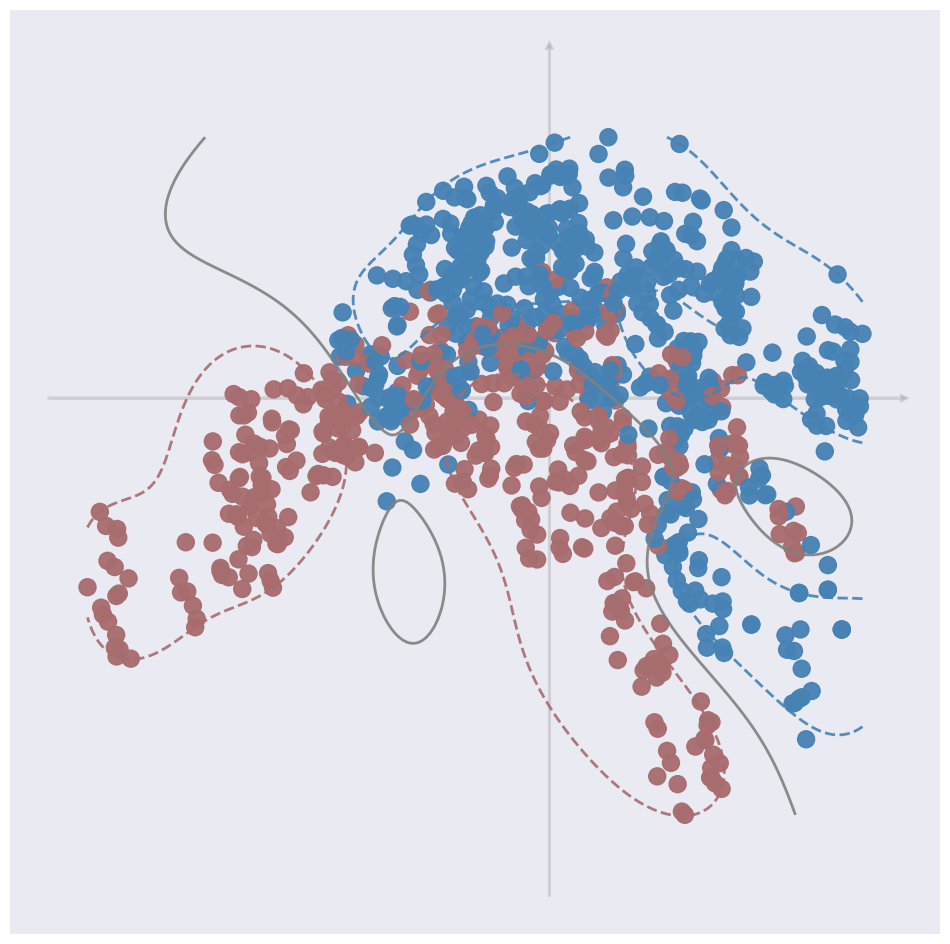

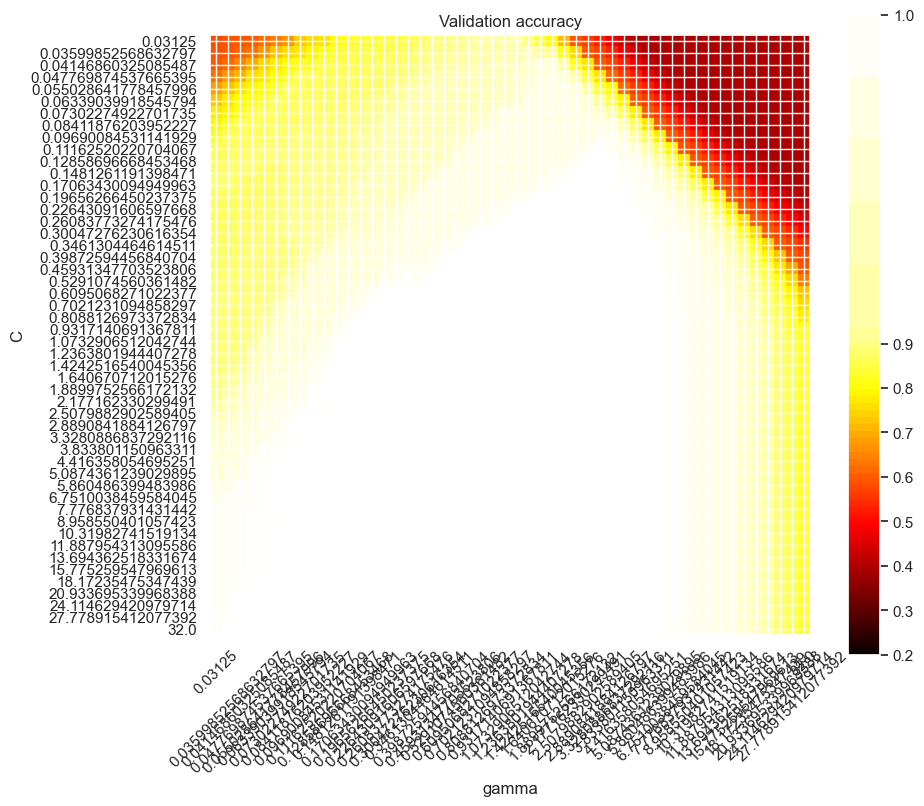

best parameters: {'C': np.float64(0.11162520220704067),
 'gamma': np.float64(2.8890841884126797),
 'kernel': 'rbf'}
best score (training data): 1.0
fitted SVM score: 1.0


/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction to Machine Learning Supervised Learning /week 8/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction to Machine Learning Supervised Learning /week 8/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


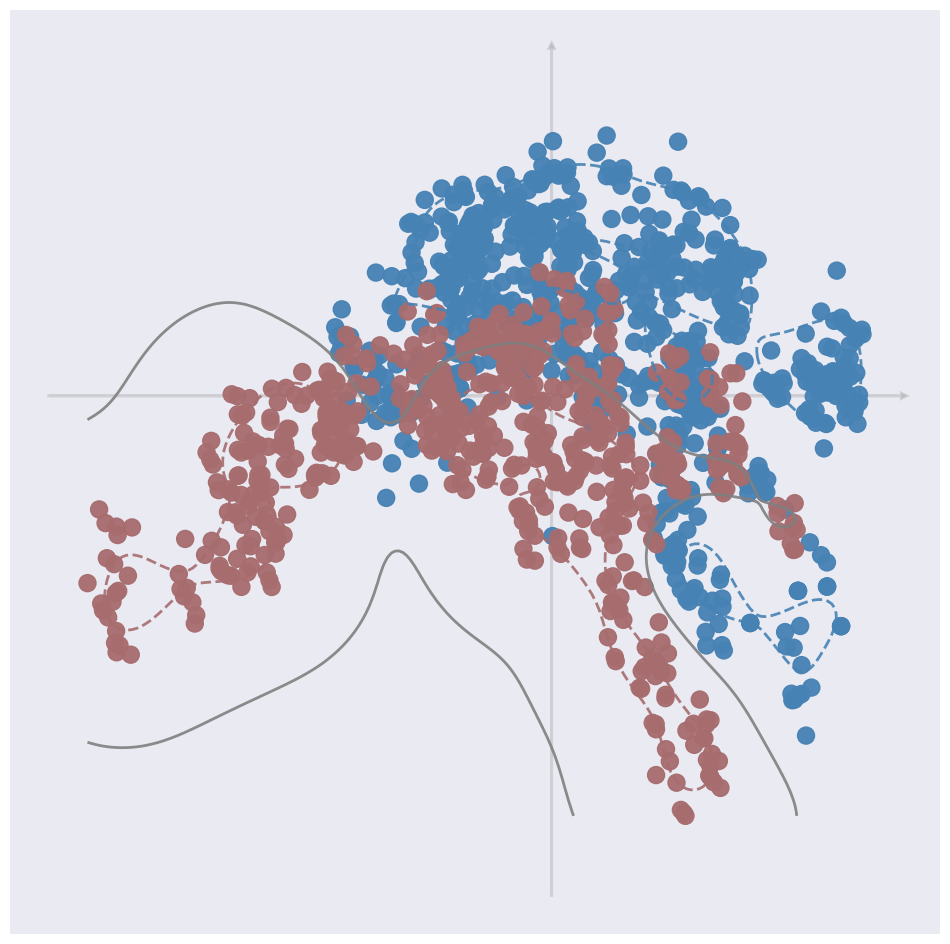

In [9]:
nlsvm= SVC(gamma=1, C=1, kernel="rbf")
nlsvm.fit(x_train, y_train['class'])

print(f"naive SVM score: {nlsvm.score(x_test, y_test['class'])}")

# The data is very mixed, naive svm doesnt fit well, lets try a grid search for better parameters
plot_svm(x_train, y_train, nlsvm)

kf = KFold(n_splits=3)

parameters = {'kernel':('rbf',), 'C':np.logspace(-5,5,base=2), 'gamma':np.logspace(-5,5,base=2)}
grid = GridSearchCV(SVC(), parameters, scoring='accuracy', cv=kf)
grid.fit(x_train, y_train['class'])

plotSearchGrid(grid)

print(f"best parameters: {pformat(grid.best_params_)}")
print(f"best score (training data): {grid.best_score_}")

print(f"best SVM score: {grid.best_estimator_.score(x_test, y_test['class'])}")

plot_svm(X, y, grid.best_estimator_)

In [10]:
# A bunch of classifiers have a 100% score on the data, but they look overfit. Let's try a naive KNN since the data is so mixed, maybe it will produce good results
knn = KNN()
knn.fit(x_train, y_train['class'])
print(f"naive KNN score: {knn.score(x_test, y_test['class'])}")

parameters = {'n_neighbors':list(range(3,9)), 'weights':('uniform','distance'), 'algorithm':('ball_tree','kd_tree','brute'), 'leaf_size':list(range(20,40)), 'p':list(range(5))}
grid = GridSearchCV(KNN(), parameters, scoring='accuracy', cv=5)
grid.fit(x_train, y_train['class'])

print(f"best parameters: {pformat(grid.best_params_)}")
print(f"best score (training data): {grid.best_score_}")

print(f"best KNN score: {grid.best_estimator_.score(x_test, y_test['class'])}")

naive KNN score: 0.9963636363636363
best parameters: {'algorithm': 'ball_tree',
 'leaf_size': 20,
 'n_neighbors': 6,
 'p': 4,
 'weights': 'uniform'}
best score (training data): 1.0
best KNN score: 0.9963636363636363


/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction to Machine Learning Supervised Learning /week 8/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3600 fits failed out of a total of 18000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction to Machine Learning Supervised Learning /week 8/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bworkman/Education/Colorado University Boulder/CSCA 5622 Introduction